In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import json
from skimage import draw
import numpy as np
from PIL import Image 
import PIL
from scipy import ndimage

In [26]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=int)
    mask[fill_row_coords, fill_col_coords] = 1 # white
    return mask

In [27]:
def show_orig_img(filename, dir_path):
    img = mpimg.imread(dir_path + filename)
    plt.imshow(img)
    plt.show()
    return img, img.shape

In [78]:
def generate_mask_images(filepath, dir_path, mask_dir_path):
    f = open(filepath,)
    data = json.load(f)

    for i in data:
        file = data[i]['filename']
        region = data[i]['regions'][0]['shape_attributes']
        all_points_x = region['all_points_x']
        all_points_y = region['all_points_y']
        (orig, dim) = show_orig_img(file, dir_path)
        mask = poly2mask(all_points_x, all_points_y, (dim[1], dim[0]))

        img = mask.astype('uint8') * 255
        img = ndimage.rotate(mask, -90)
        
        cv2.imwrite(mask_dir_path + file.split(".")[0] + "_mask.jpg", img)

        im = Image.open(mask_dir_path + file.split(".")[0] + "_mask.jpg")
        im.save(mask_dir_path + file.split(".")[0] + "_mask.gif")

        im1 = Image.open(mask_dir_path + file.split(".")[0] + "_mask.gif")

        # print(img.shape) // (334, 224)
        # print(mpimg.imread(mask_dir_path + file.split(".")[0] + "_mask.jpg").shape) // (334, 224)
        # print(mpimg.imread(mask_dir_path + file.split(".")[0] + "_mask.gif").shape) // (334, 224, 4)

        plt.imshow(img)
        plt.show()

    f.close()

In [79]:
def show_image_with_mask(img, mask):
    fig = plt.figure(figsize=(28, 2))
    
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original')
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(mask)
    plt.axis('off')
    plt.title('Mask')

# Generating image mask from json polygons

# Train

In [80]:
train_img_dir = "./imgs/"
train_mask_dir = "./mask/"
train_data = "./train_mask_2.json"

train_imgs = [f for f in listdir(train_img_dir) if isfile(join(train_img_dir, f))]

In [81]:
print(train_imgs)

['DSC_2701.jpg', 'DSC_2703.jpg', 'DSC_2706.jpg', 'DSC_2709.jpg', 'DSC_2710.jpg', 'DSC_2711.jpg', 'DSC_2712.jpg', 'DSC_2713.jpg', 'DSC_2715.jpg', 'DSC_2717.jpg', 'DSC_2718.jpg', 'DSC_2719.jpg', 'DSC_2720.jpg', 'DSC_2723.jpg', 'DSC_2724.jpg', 'DSC_2725.jpg', 'DSC_2726.jpg', 'DSC_2727.jpg', 'DSC_2728.jpg', 'DSC_2729.jpg', 'DSC_2730.jpg', 'IMG_9267.jpg', 'IMG_9272.jpg', 'IMG_9286.jpg', 'IMG_9290.jpg', 'IMG_9293.jpg', 'IMG_9294.jpg', 'IMG_9296.jpg', 'IMG_9299.jpg', 'IMG_9303.jpg', 'IMG_9306.jpg', 'IMG_9308.jpg', 'IMG_9311.jpg', 'IMG_9312.jpg', 'IMG_9320.jpg', 'IMG_9321.jpg', 'IMG_9322.jpg', 'IMG_9325.jpg', 'IMG_9331.jpg', 'IMG_9335.jpg', 'IMG_9336.jpg', 'IMG_9337.jpg', 'IMG_9338.jpg', 'IMG_9339.jpg', 'IMG_9340.jpg', 'IMG_9341.jpg', 'IMG_9342.jpg', 'IMG_9343.jpg', 'IMG_9344.jpg', 'IMG_9346.jpg', 'IMG_9348.jpg', 'IMG_9349.jpg', 'IMG_9350.jpg', 'IMG_9352.jpg', 'IMG_9353.jpg', 'IMG_9354.jpg', 'IMG_9355.jpg', 'IMG_9356.jpg', 'IMG_9357.jpg', 'IMG_9360.jpg', 'IMG_9364.jpg', 'IMG_9369.jpg', 'IMG_93

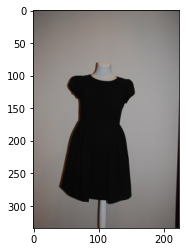

(334, 224)
(334, 224)
(334, 224, 4)


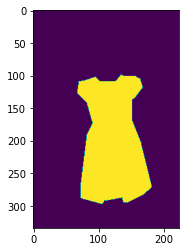

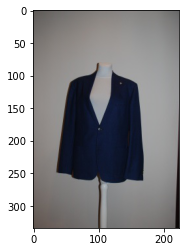

(334, 224)
(334, 224)
(334, 224, 4)


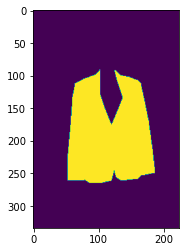

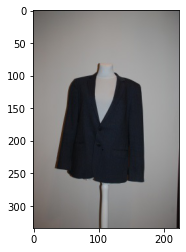

(334, 224)
(334, 224)
(334, 224, 4)


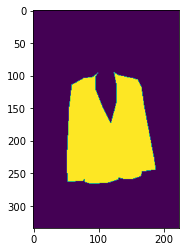

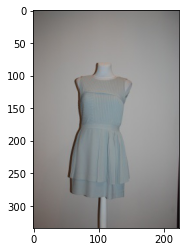

(334, 224)
(334, 224)
(334, 224, 4)


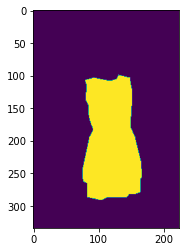

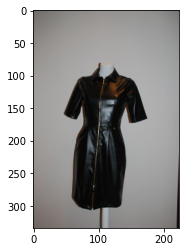

(334, 224)
(334, 224)
(334, 224, 4)


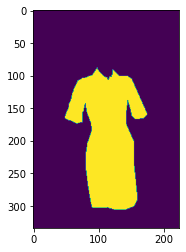

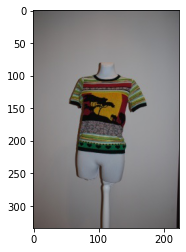

(334, 224)
(334, 224)
(334, 224, 4)


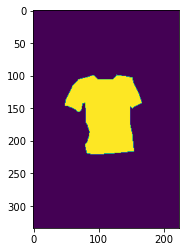

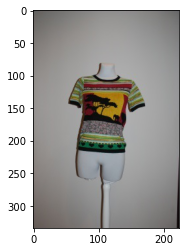

(334, 224)
(334, 224)
(334, 224, 4)


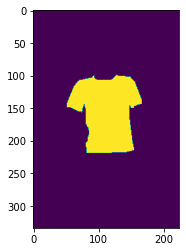

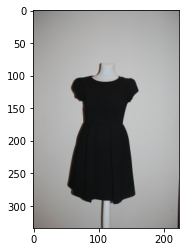

(334, 224)
(334, 224)
(334, 224, 4)


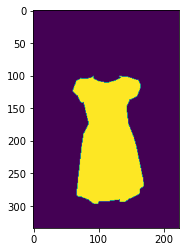

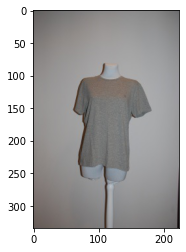

(334, 224)
(334, 224)
(334, 224, 4)


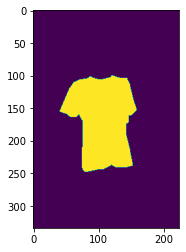

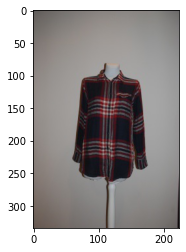

(334, 224)
(334, 224)
(334, 224, 4)


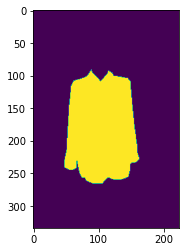

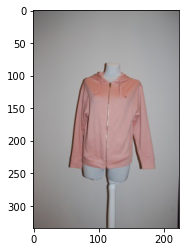

(334, 224)
(334, 224)
(334, 224, 4)


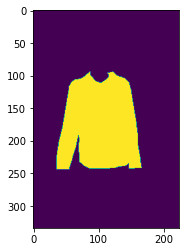

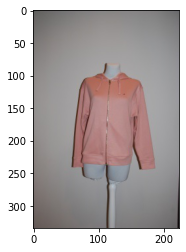

(334, 224)
(334, 224)
(334, 224, 4)


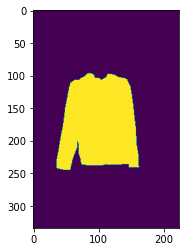

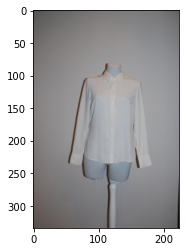

(334, 224)
(334, 224)
(334, 224, 4)


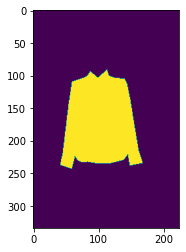

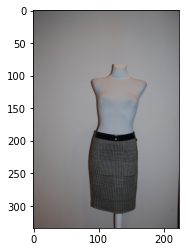

(334, 224)
(334, 224)
(334, 224, 4)


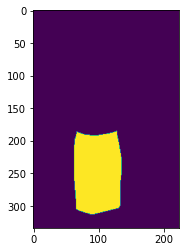

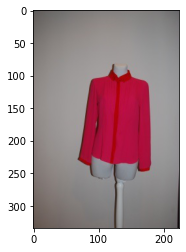

(334, 224)
(334, 224)
(334, 224, 4)


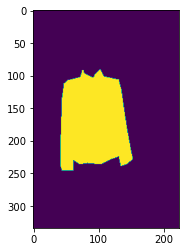

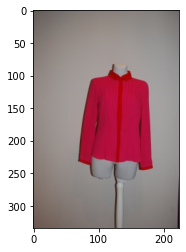

(334, 224)
(334, 224)
(334, 224, 4)


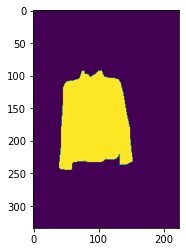

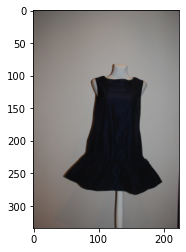

(334, 224)
(334, 224)
(334, 224, 4)


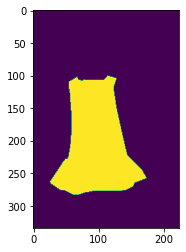

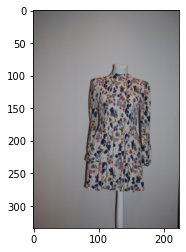

(334, 224)
(334, 224)
(334, 224, 4)


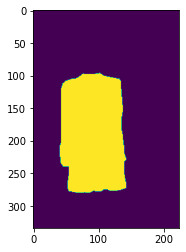

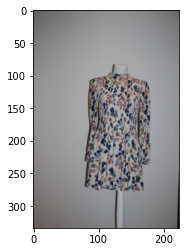

(334, 224)
(334, 224)
(334, 224, 4)


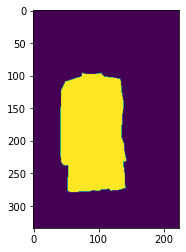

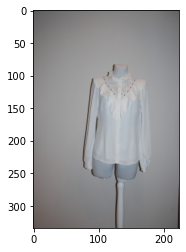

(334, 224)
(334, 224)
(334, 224, 4)


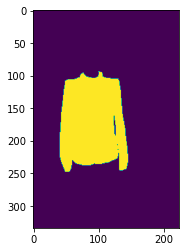

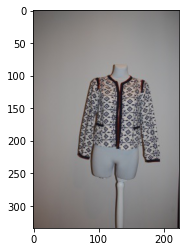

(334, 224)
(334, 224)
(334, 224, 4)


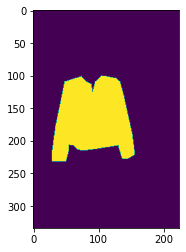

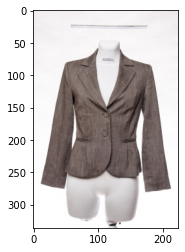

(336, 224)
(336, 224)
(336, 224, 4)


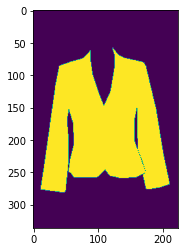

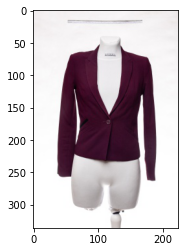

(336, 224)
(336, 224)
(336, 224, 4)


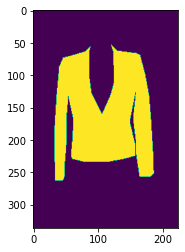

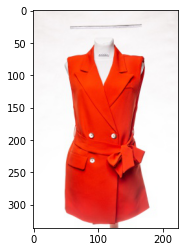

(336, 224)
(336, 224)
(336, 224, 4)


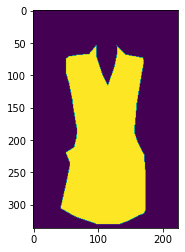

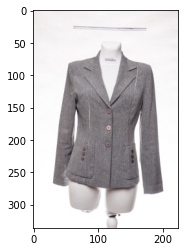

(336, 224)
(336, 224)
(336, 224, 4)


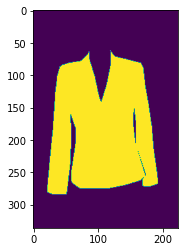

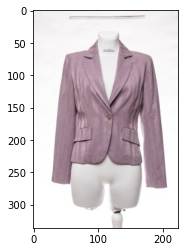

(336, 224)
(336, 224)
(336, 224, 4)


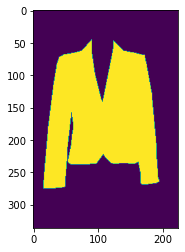

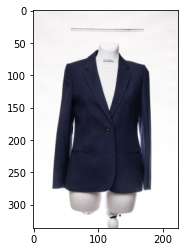

(336, 224)
(336, 224)
(336, 224, 4)


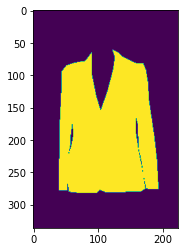

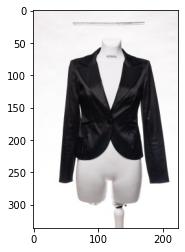

(336, 224)
(336, 224)
(336, 224, 4)


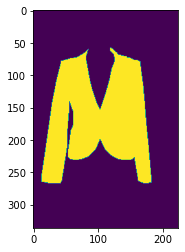

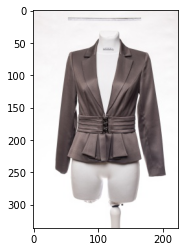

(336, 224)
(336, 224)
(336, 224, 4)


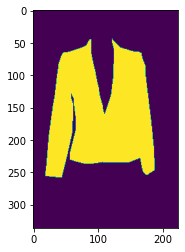

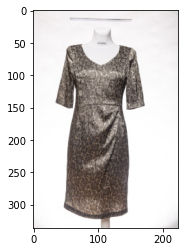

(336, 224)
(336, 224)
(336, 224, 4)


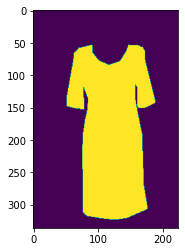

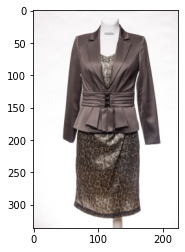

(336, 224)
(336, 224)
(336, 224, 4)


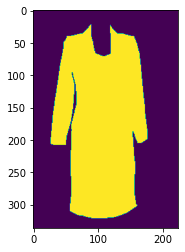

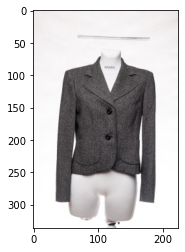

(336, 224)
(336, 224)
(336, 224, 4)


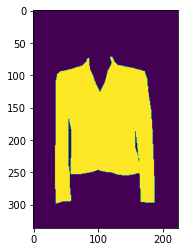

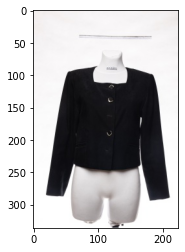

(336, 224)
(336, 224)
(336, 224, 4)


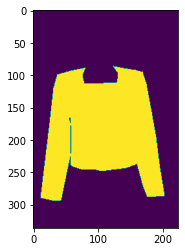

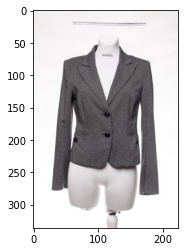

(336, 224)
(336, 224)
(336, 224, 4)


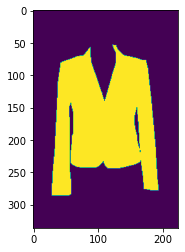

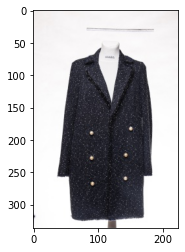

(336, 224)
(336, 224)
(336, 224, 4)


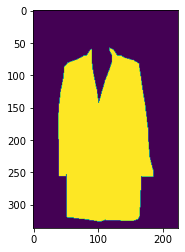

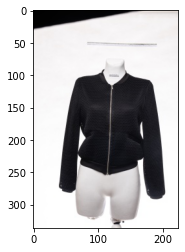

(336, 224)
(336, 224)
(336, 224, 4)


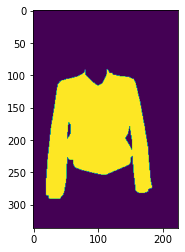

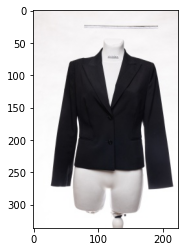

(336, 224)
(336, 224)
(336, 224, 4)


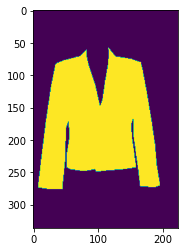

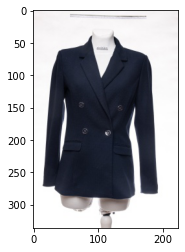

(336, 224)
(336, 224)
(336, 224, 4)


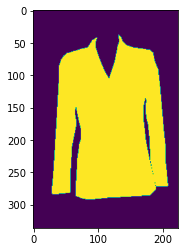

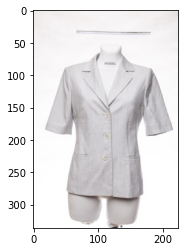

(336, 224)
(336, 224)
(336, 224, 4)


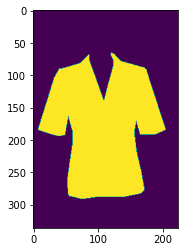

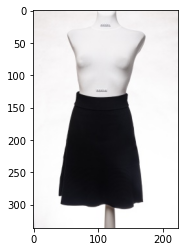

(336, 224)
(336, 224)
(336, 224, 4)


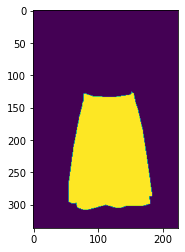

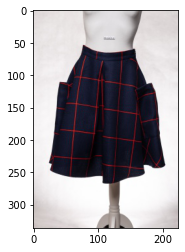

(336, 224)
(336, 224)
(336, 224, 4)


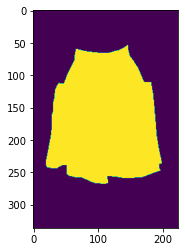

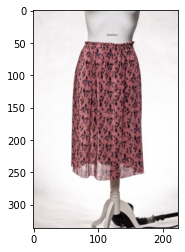

(336, 224)
(336, 224)
(336, 224, 4)


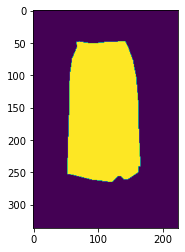

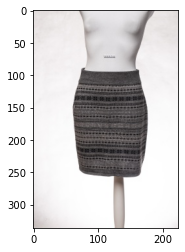

(336, 224)
(336, 224)
(336, 224, 4)


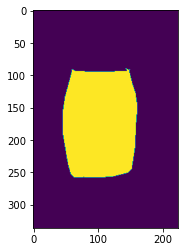

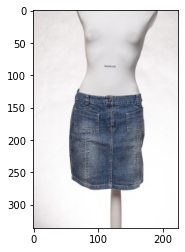

(336, 224)
(336, 224)
(336, 224, 4)


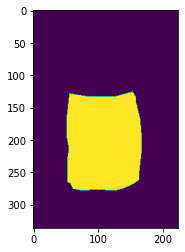

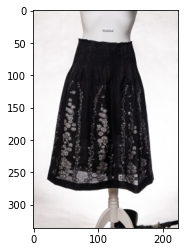

(336, 224)
(336, 224)
(336, 224, 4)


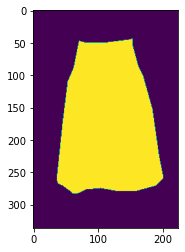

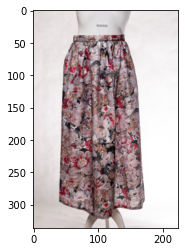

(336, 224)
(336, 224)
(336, 224, 4)


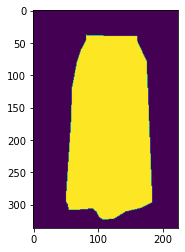

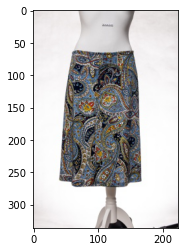

(336, 224)
(336, 224)
(336, 224, 4)


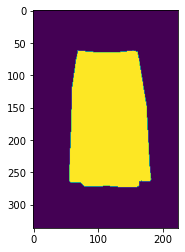

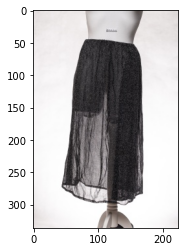

(336, 224)
(336, 224)
(336, 224, 4)


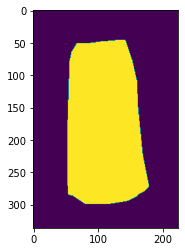

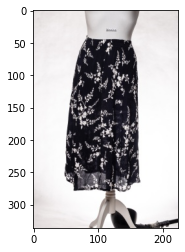

(336, 224)
(336, 224)
(336, 224, 4)


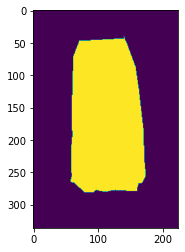

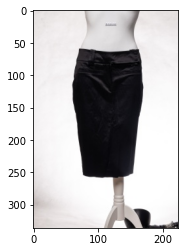

(336, 224)
(336, 224)
(336, 224, 4)


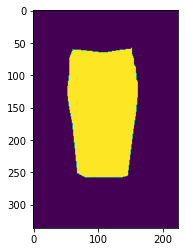

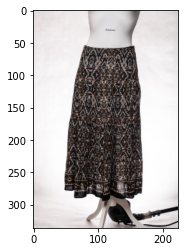

(336, 224)
(336, 224)
(336, 224, 4)


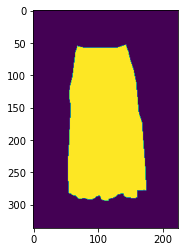

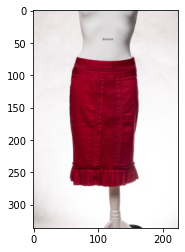

(336, 224)
(336, 224)
(336, 224, 4)


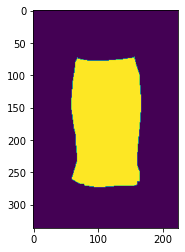

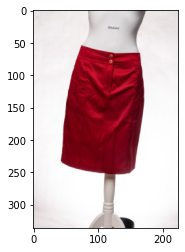

(336, 224)
(336, 224)
(336, 224, 4)


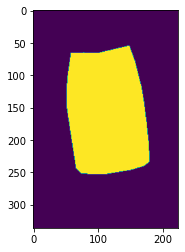

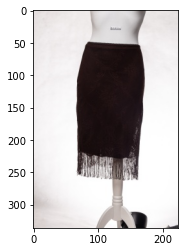

(336, 224)
(336, 224)
(336, 224, 4)


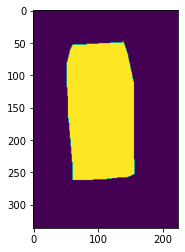

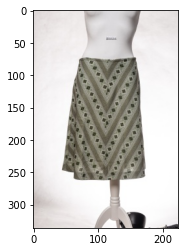

(336, 224)
(336, 224)
(336, 224, 4)


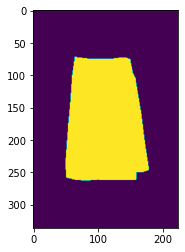

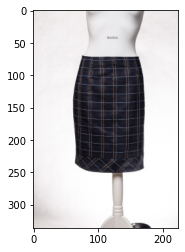

(336, 224)
(336, 224)
(336, 224, 4)


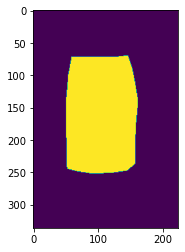

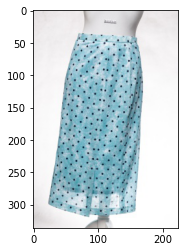

(336, 224)
(336, 224)
(336, 224, 4)


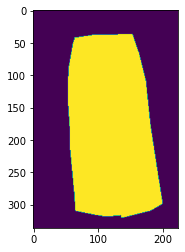

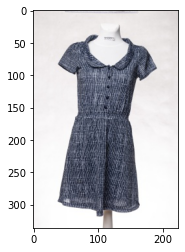

(336, 224)
(336, 224)
(336, 224, 4)


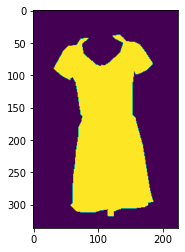

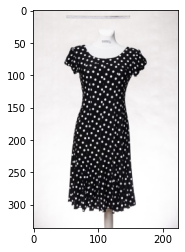

(336, 224)
(336, 224)
(336, 224, 4)


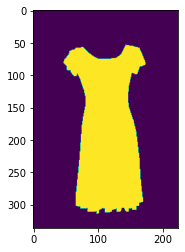

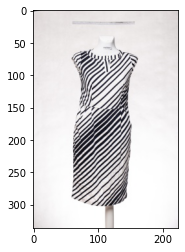

(336, 224)
(336, 224)
(336, 224, 4)


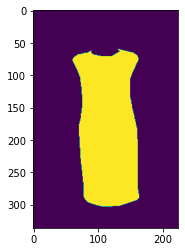

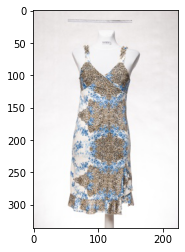

(336, 224)
(336, 224)
(336, 224, 4)


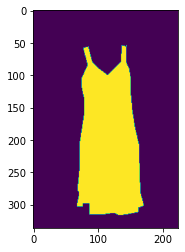

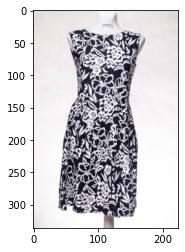

(336, 224)
(336, 224)
(336, 224, 4)


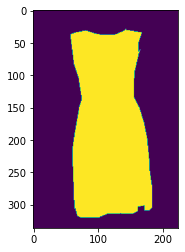

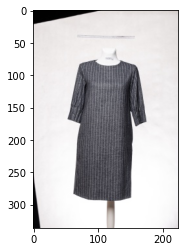

(336, 224)
(336, 224)
(336, 224, 4)


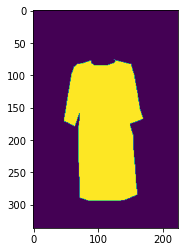

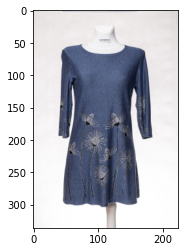

(336, 224)
(336, 224)
(336, 224, 4)


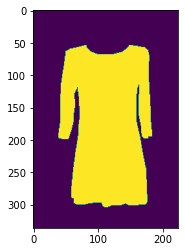

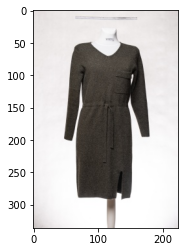

(336, 224)
(336, 224)
(336, 224, 4)


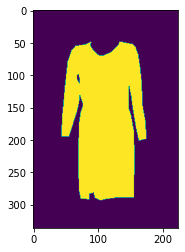

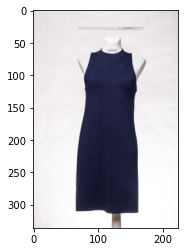

(336, 224)
(336, 224)
(336, 224, 4)


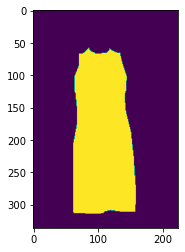

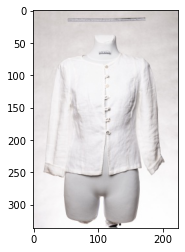

(336, 224)
(336, 224)
(336, 224, 4)


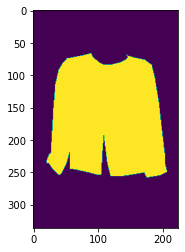

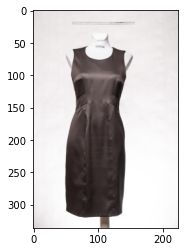

(336, 224)
(336, 224)
(336, 224, 4)


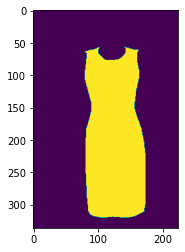

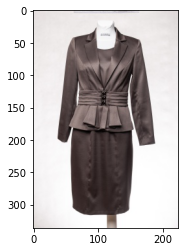

(336, 224)
(336, 224)
(336, 224, 4)


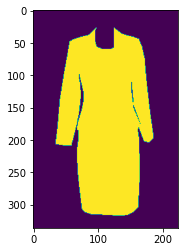

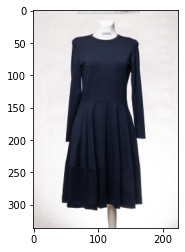

(336, 224)
(336, 224)
(336, 224, 4)


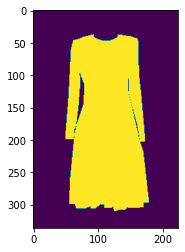

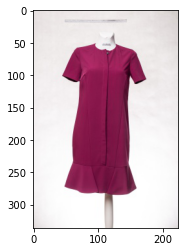

(336, 224)
(336, 224)
(336, 224, 4)


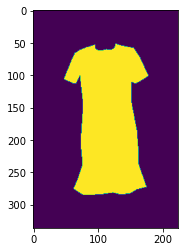

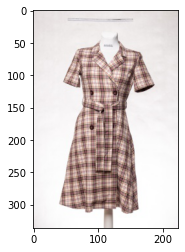

(336, 224)
(336, 224)
(336, 224, 4)


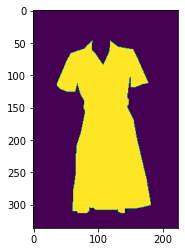

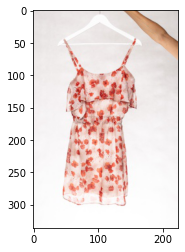

(336, 224)
(336, 224)
(336, 224, 4)


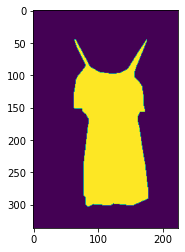

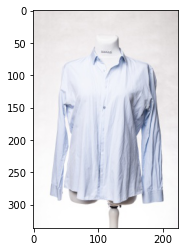

(336, 224)
(336, 224)
(336, 224, 4)


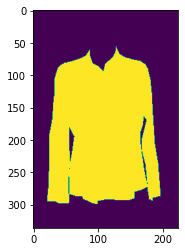

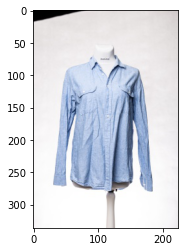

(336, 224)
(336, 224)
(336, 224, 4)


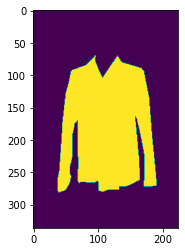

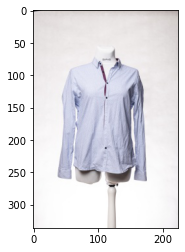

(336, 224)
(336, 224)
(336, 224, 4)


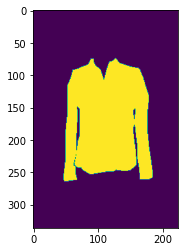

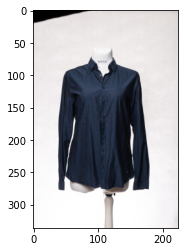

(336, 224)
(336, 224)
(336, 224, 4)


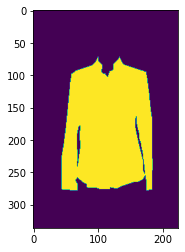

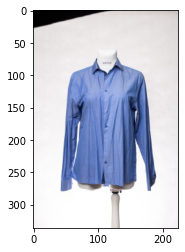

(336, 224)
(336, 224)
(336, 224, 4)


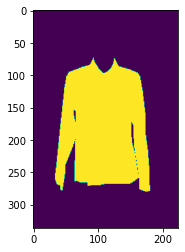

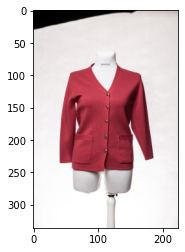

(336, 224)
(336, 224)
(336, 224, 4)


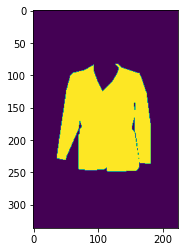

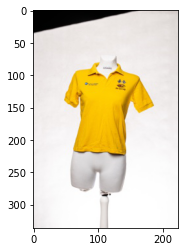

(336, 224)
(336, 224)
(336, 224, 4)


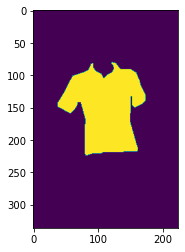

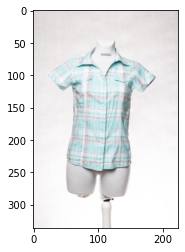

(336, 224)
(336, 224)
(336, 224, 4)


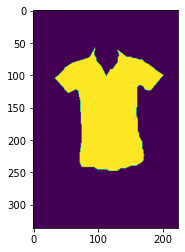

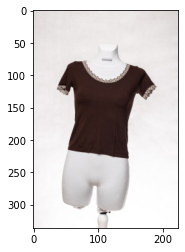

(336, 224)
(336, 224)
(336, 224, 4)


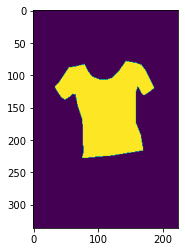

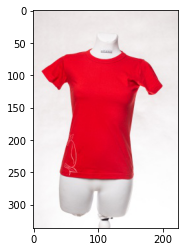

(336, 224)
(336, 224)
(336, 224, 4)


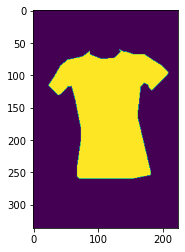

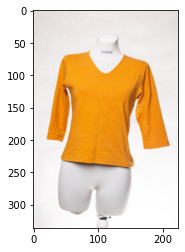

(336, 224)
(336, 224)
(336, 224, 4)


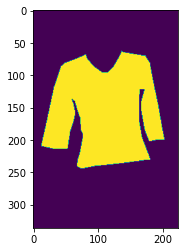

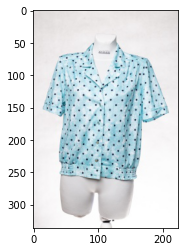

(336, 224)
(336, 224)
(336, 224, 4)


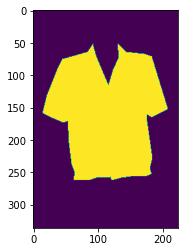

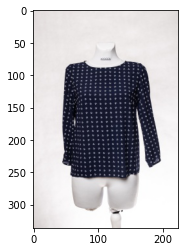

(336, 224)
(336, 224)
(336, 224, 4)


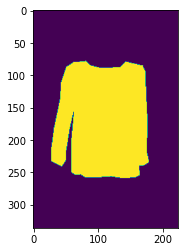

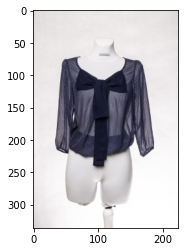

(336, 224)
(336, 224)
(336, 224, 4)


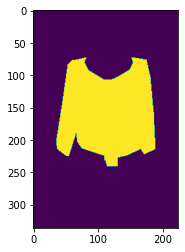

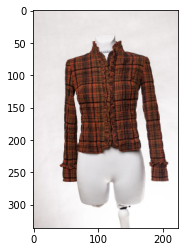

(336, 224)
(336, 224)
(336, 224, 4)


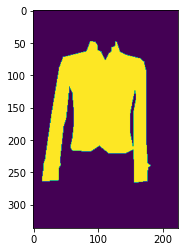

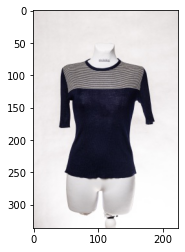

(336, 224)
(336, 224)
(336, 224, 4)


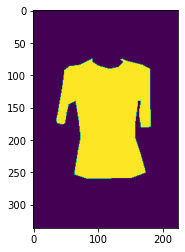

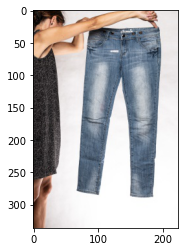

(336, 224)
(336, 224)
(336, 224, 4)


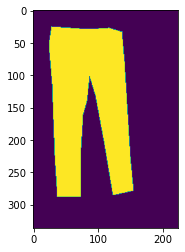

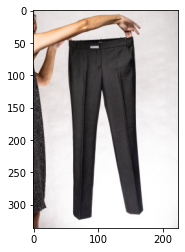

(336, 224)
(336, 224)
(336, 224, 4)


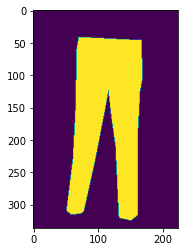

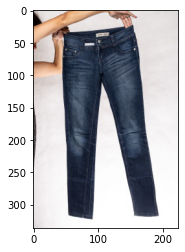

(336, 224)
(336, 224)
(336, 224, 4)


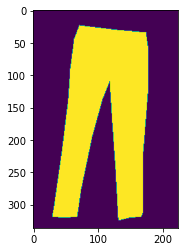

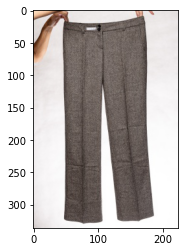

(336, 224)
(336, 224)
(336, 224, 4)


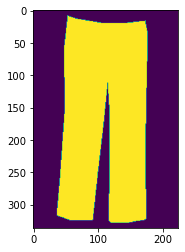

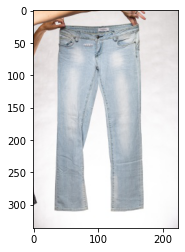

(336, 224)
(336, 224)
(336, 224, 4)


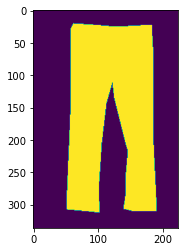

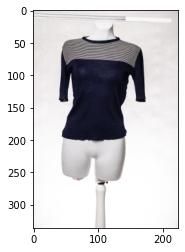

(336, 224)
(336, 224)
(336, 224, 4)


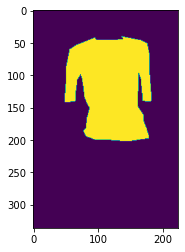

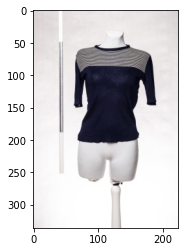

(336, 224)
(336, 224)
(336, 224, 4)


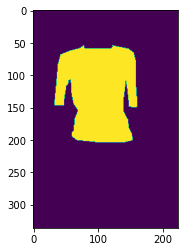

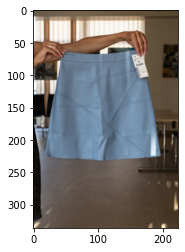

(336, 224)
(336, 224)
(336, 224, 4)


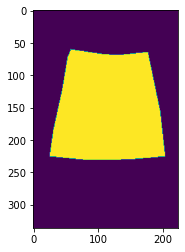

In [82]:
generate_mask_images(train_data, train_img_dir, train_mask_dir)

In [116]:
val_imgs = "/data/datasets/clothing-size/val/imgs"
val_img_mask = "/data/datasets/clothing-size/val/mask"

In [115]:
imgs = [f for f in listdir(val_imgs) if isfile(join(val_imgs, f))]
mask = [f for f in listdir(val_img_mask) if isfile(join(val_img_mask, f))]

for i in range(len(imgs)):
    img_path = val_imgs + "/" + imgs[i]
    mask_path = val_img_mask + "/" + imgs[i].split(".")[0] + "_mask.gif"
    print(img_path)
    print(mask_path)
    im = mpimg.imread(img_path)
    print(im.shape)
    
    mask = mpimg.imread(img_path)
    print(im.shape)

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [204]:
img = "/data/datasets/carnava/data/masks/768f299c36e1_16_mask.gif"

mask = mpimg.imread(img)
print(mask.shape)
print(mask)

(1280, 1918, 4)
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


In [250]:
img = "/data/datasets/clothing-size/val/mask/DSC_2721_mask.gif"

mask = mpimg.imread(img)
print(mask.shape)
print(mask)

(334, 224, 4)
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
